# Problem Statement 

## 1. Objective
The goal is to develop a predictive model that accurately forecasts the performance index based on various predictors such as hours studied, previous scores, participation in extracurricular activities, sleep hours, and the number os sample question papers practiced.

## 2. Dataset
The dataset consists of 10,000 students records, each containing the following variables:
1. Hours Studied: The total number of hours spent studying by each student.
2. Previous Scores: The scores obtained by students in previous tests.
3. Extracurricular Activities: Whether the student participates in extracurricular activities. 
4. Sleep Hours: The average number of hours of sleep the student had per day.
5. Sample Question Papers Practiced: The number of sample question papers the student practiced. 

The target variable is:
* Performance index: A measure of the overall performance of each student, ranging from 10 to 100, with higher values indicating better performance. 

## 4. Methodology
This problem will be addressed using two different methods:
* Implementing a Multiple Linear Regression model from scratch.
* Implementing a Multiple Linear Regression using the sklearn.linear_model.LinearRegression.class

### Tools
* NumPy: A library for scientific computing, mainly involving linear algebra operations.
* Pandas: A library for data analysis and manipulation.
* Matplotlib: A library for plotting data.
* Scikit-learn (Sklearn): A machine learning library that provides simple and efficient tools for data analysis and machine learning tasks.

In [1]:
#Imports

import copy, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset 

Tasks:
1. Understanding the dataset
2. Extracting data from the dataset into the features and label arrays
3. Splitting data (training and testing sets)

### 1. Understanding the datatset

In [3]:
#1. Understanding the dataset

df = pd.read_csv('Student_Performance.csv')
header = list(df)

print(f'Dataset\n {df}')

#Verifying if there are null values in the dataset
print(f'Number of null data:\n{df.isnull().sum()}')

#Data description
print(f'\n{df.describe()}')

Dataset
       Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers P

Thus, our feature array will be a 2-D array with 10000 rows and 5 columns, i.e (10000,5).

When visualizing the dataset, we can see that we need to work on the data a little bit on it:
* Converting strings to int (Yes/No --> 1/0)
* Normalizing feature values (we can see that the 2nd column has discrepant higher values than the 5th column)

In [4]:
#Replacing Yes/No features with 0 or 1
df = df.replace({'Yes':1, 'No':0}).infer_objects(copy=False)

### 2. Extracting the data

Extracting the data from DataFrame structure into NumPy arrays

In [5]:
#Splitting variables 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_set = X.to_numpy()
y_set = y.to_numpy()

print(f"X set shape: {X_set.shape}\ny set shape: {y_set.shape}")

X set shape: (10000, 5)
y set shape: (10000,)


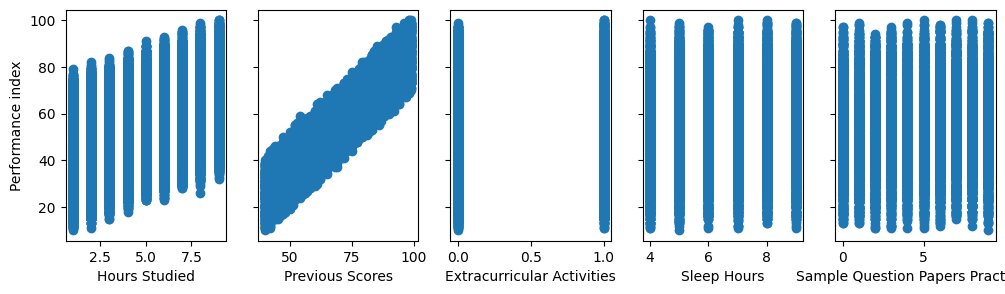

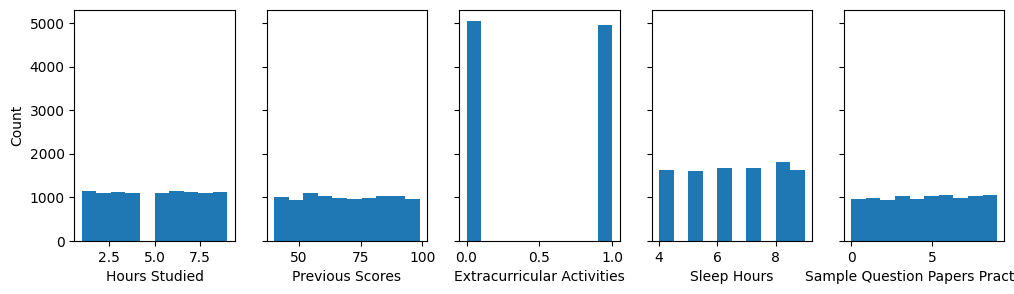

In [6]:
fig,ax=plt.subplots(1, 5, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_set[:,i],y_set)
    ax[i].set_xlabel(header[i])
ax[0].set_ylabel("Performance index")
plt.show()

fig,ax=plt.subplots(1, 5, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].hist(X_set[:,i])
    ax[i].set_xlabel(header[i])
ax[0].set_ylabel("Count")
plt.show()

To normalize the data, we are going to use the z-score normalization.

In [7]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

In [8]:
# normalize the original features
X_set_norm, X_mu, X_sigma = zscore_normalize_features(X_set)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")

X_mu = [ 4.9929 69.4457  0.4948  6.5306  4.5833], 
X_sigma = [ 2.58917933 17.34228507  0.49997296  1.69577818  2.86720441]


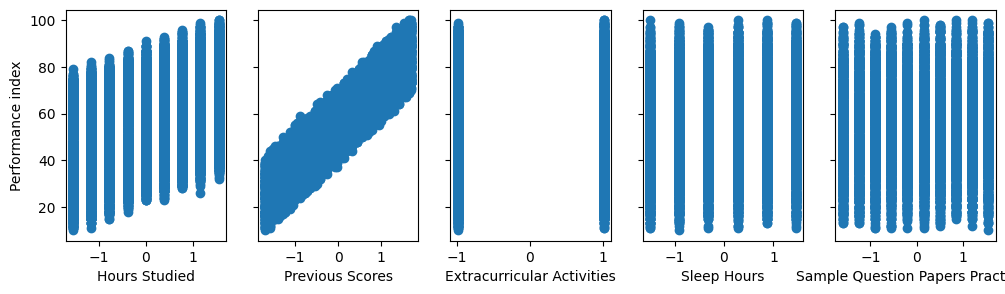

In [9]:
fig,ax=plt.subplots(1, 5, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_set_norm[:,i],y_set)
    ax[i].set_xlabel(header[i])
ax[0].set_ylabel("Performance index")
plt.show()

### 3. Splitting Data

We are going to create our train and test sets, with the following distribution from the original dataset:
* 80% of the data will be the training set
* 20% of the data will be the testing set

X_train shape: (8000, 5)	X_test shape: (2000, 5)
y_train shape: (8000,)		y_test shape: (2000,)


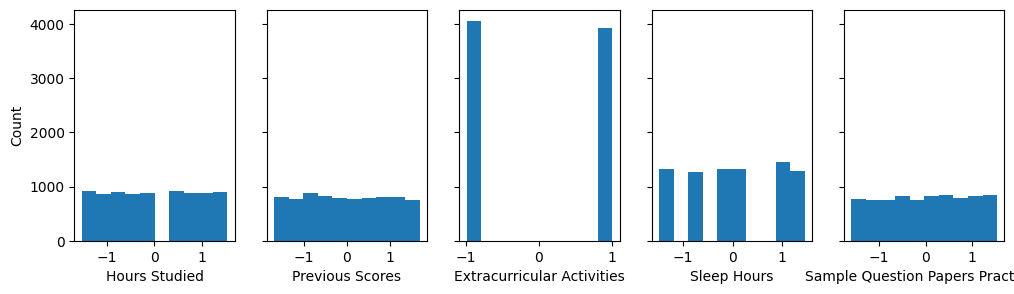

In [10]:
#Splitting data
total_samples = X_set_norm.shape[0]
# Test data percentage - 20%
test_percentage = 0.20

# Number of test samples
n_test_samples = int(total_samples * test_percentage)

# Generate random indices
indices = np.arange(total_samples)
np.random.shuffle(indices)

# Split indices into training and test sets
test_indices = indices[:n_test_samples]
train_indices = np.setdiff1d(indices, test_indices)

X_train, X_test = X_set_norm[train_indices], X_set_norm[test_indices]
y_train, y_test = y_set[train_indices], y_set[test_indices]

print(f"X_train shape: {X_train.shape}\tX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\t\ty_test shape: {y_test.shape}")

fig,ax=plt.subplots(1, 5, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].hist(X_train[:,i])
    ax[i].set_xlabel(header[i])
ax[0].set_ylabel("Count")
plt.show()

## 2. Implementing the Multiple Linear Regression

In order to implement the Multiple Linear Regression from scratch, we need to implement the following functions:
1. compute_cost
2. compute_gradient
3. gradient_descent

In [11]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0

    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + ((f_wb_i - y[i])**2)
    cost = cost/(2*m)
    return cost

In [12]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        err = f_wb_i - y[i]

        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db += err

    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [13]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iter):
    
    w = copy.deepcopy(w_in) #avoid modifying global w within function
    b = b_in
    J_history = []

    for i in range(num_iter):
        #Calculate gradients
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        #Update parameters w and b
        w -= (alpha * dj_dw)
        b -= (alpha * dj_db)

        #Calculate J 
        cost = compute_cost(X, y, w, b)
        if (len(J_history) > 1) and (J_history[-1] - cost) < 1e-10:
            break 
        
        J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")
        
    #Return final w,b and J history for graphing    
    return w, b, J_history 

In [14]:
#Initializing data
initial_w = np.random.rand(X_train.shape[1])
initial_b = np.random.randn()

alpha = 0.001
num_iter = 50000

#Running gradient descent - with normalized data
final_w, final_b, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, alpha, num_iter)

Iteration    0: Cost 1716.145920585459
Iteration 5000: Cost 2.138081543718529
Iteration 10000: Cost 2.05363878836698


In [15]:
print(f"For learning rate = {alpha} ---- b, w found by gradient descent: {final_b:0.2f}, {final_w}")

For learning rate = 0.001 ---- b, w found by gradient descent: 55.21, [ 7.37646812 17.66381397  0.31466718  0.82524053  0.55380675]


When finding the final values for w and b, we need to implement the predict and the R2 score function. 

In [16]:
def r2_score(y, preds):
    v = np.sum((y - np.mean(y)) ** 2) # Calculate the total sum of squares
    u = np.sum((y - preds) ** 2) # Calculate the residual sum of squares (RSS)
    r2 = 1 - (u / v) # Calculate the R^2 score

    return r2

In [17]:
def prediction(X, final_w, final_b):
    m = X.shape[0]
    preds = []

    for i in range(m):
        f_wb = np.dot(X[i], final_w) + final_b
        preds.append(f_wb)
    return preds

In [18]:
# Calculating predictions
preds = prediction(X_test, final_w, final_b)
r2 = r2_score(y_test, preds)
mse = compute_cost(X_test, y_test, final_w, final_b)

print(f'R^2: {r2:.4f}')
print(f'MSE: {mse:.4f}')

R^2: 0.9885
MSE: 2.1653


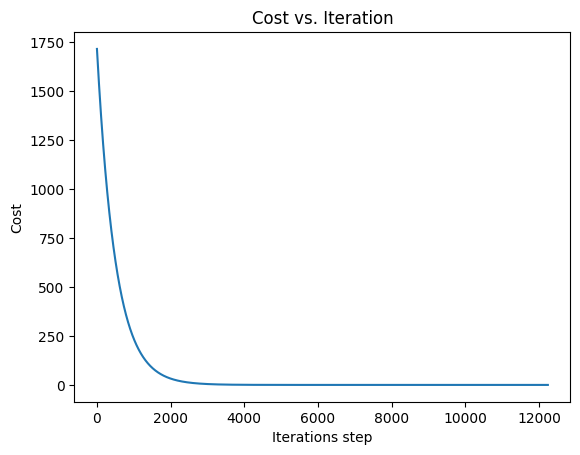

In [19]:
#Plot cost versus iteration  
plt.plot(J_hist, '-')
plt.xlabel('Iterations step')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.show()

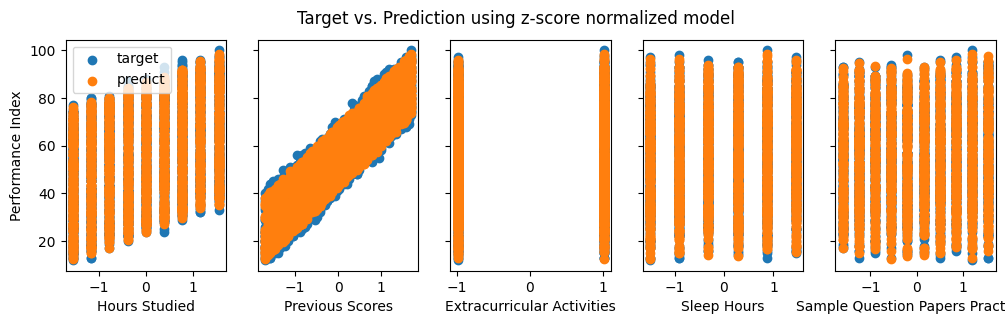

In [20]:
#Plot predictions vs targets  
fig,ax=plt.subplots(1,5,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test[:,i],y_test, label = 'target')
    ax[i].set_xlabel(header[i])
    ax[i].scatter(X_test[:,i],preds, label = 'predict')
ax[0].set_ylabel("Performance Index"); ax[0].legend();
fig.suptitle("Target vs. Prediction (z-score normalized model)")
plt.show()

## 3. Sklearn Implementation

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
#Defining the model
regressor = LinearRegression().fit(X_train, y_train)
print(f'\nR2 score (training set): {regressor.score(X_train, y_train):.4f}')

#Making predictions
y_pred_test = regressor.predict(X_test)
sk_r2_score = regressor.score(X_test, y_test)
sk_mse = mean_squared_error(y_test, y_pred_test)

print(f'R2 score (testing set): {sk_r2_score:.4f}')
print(f'\nMSE: {sk_mse}')
print(f'\nCoefficient (w): {regressor.coef_}')
print(f'\nIntercept (b): {regressor.intercept_:.2f}')

print(X_test.shape, y_test.shape)


R2 score (training set): 0.9888
R2 score (testing set): 0.9885

MSE: 4.330561889119774

Coefficient (w): [ 7.37650942 17.66395347  0.31467342  0.82525965  0.55379008]

Intercept (b): 55.21
(2000, 5) (2000,)


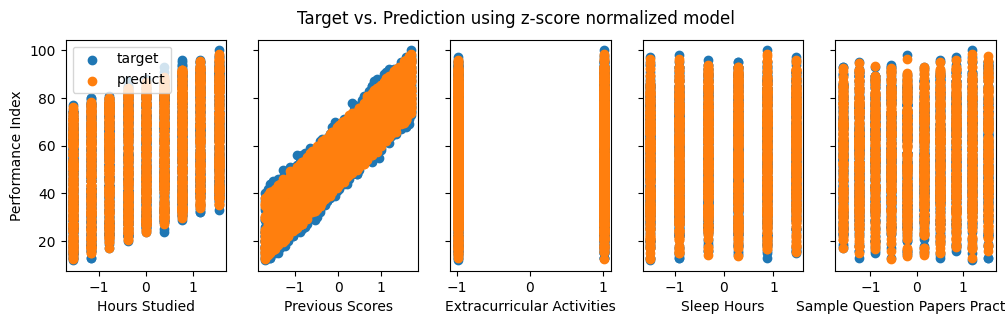

In [23]:
# Prediction on testing set
fig,ax=plt.subplots(1,5,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test[:,i],y_test, label = 'target')
    ax[i].set_xlabel(header[i])
    ax[i].scatter(X_test[:,i], y_pred_test, label = 'predict')
ax[0].set_ylabel("Performance Index"); ax[0].legend();
fig.suptitle("Target vs. Prediction (sklearn model)")
plt.show()

In [31]:
print(f'MSE:\tMultiple LR={J_hist[-1]:0.2f}\t\t\tSklearn={sk_mse:.2f}')
print(f'R2:\tMultiple LR={r2:0.4f}\t\t\tSklearn={sk_r2_score:.4f}')
print(f'b:\tMultiple LR={final_b:0.2f}\t\t\tSklearn={regressor.intercept_:.2f}')
print(f'w:\tMultiple LR={final_w}\nw:\tSklearn={regressor.coef_}')


MSE:	Multiple LR=2.05			Sklearn=4.33
R2:	Multiple LR=0.9885			Sklearn=0.9885
b:	Multiple LR=55.21			Sklearn=55.21
w:	Multiple LR=[ 7.37646812 17.66381397  0.31466718  0.82524053  0.55380675]
w:	Sklearn=[ 7.37650942 17.66395347  0.31467342  0.82525965  0.55379008]
